,Number,Factorial,Execution Time (FOR LOOP) in ms,Execution Time (Recursive) in ms,Diff (Recursive - FOR LOOP)
3,231,1792233667382633521618843263044232513197622942...,0.0648,0.1104,0.0456
6,247,2094090077023647967561092467952045906849879335...,0.0724,0.1249,0.0525
1,252,2044846242150228822847561620446453545273658548...,0.0846,0.1149,0.0303
9,269,2467449668395963947941119250272642454729425529...,0.0871,0.1418,0.0547
7,302,2782123997549888669688724567284431294868149947...,0.0984,0.1607,0.0623
2,349,3531068737901396428982719993329898777843773541...,0.1231,0.1996,0.0765
4,356,2411461400049600936515684788441469746144503375...,0.1288,0.2102,0.0814
5,377,1733907628049636822809630132496110131703412929...,0.1500,0.2338,0.0838
0,462,1419159881532604159360102000036080964658416816...,0.2292,0.3709,0.1417
8,463,6570710251495957257837272260167054866368469858...,0.2130,0.3529,0.1399


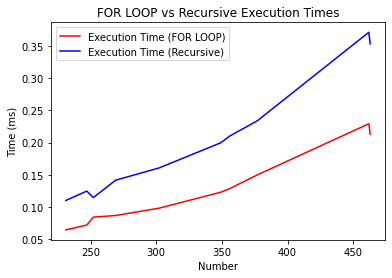

In [8]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from random import seed
from random import random
from decimal import Decimal

def for_loop_fact(x):    
    ans = 1    
    for i in range(1,x+1):         
        ans = ans * i     
    return ans

def rec_fact(x):
  if x == 1:
    return 1
  else:
    return x * rec_fact(x-1)
    

np.random.seed(3)

#Create array of 10 random numbers between 100 - 500
set1 = np.random.randint(100,500,10)
dataset = []

#Loop through each number in array
for num in set1:
    
    num = int(num)

# Next get the factorial using an iterative FOR LOOP function as well as the timing
    loop_start_time = time.perf_counter()
    loop_fact = for_loop_fact(num)
    loop_fact = Decimal(loop_fact)
    loop_end_time = time.perf_counter()
    loop_time_calc = loop_end_time - loop_start_time
    loop_time_calc = loop_time_calc * 1000


# Then get the factorial using recursive function as well as the timing
    fact_start_time = time.perf_counter()
    rec_fact_val = rec_fact(num)
    rec_fact_val = Decimal(rec_fact_val)
    fact_end_time = time.perf_counter()
    fact_time_calc = fact_end_time - fact_start_time
    fact_time_calc = fact_time_calc * 1000

# Append values to the dataset for use in dataframe
    dataset_row = [num, loop_fact, loop_time_calc, fact_time_calc, fact_time_calc - loop_time_calc]
    dataset.append(dataset_row)

# Create dataframe
df = pd.DataFrame(dataset)

df.columns = ["Number", "Factorial", "Execution Time (FOR LOOP) in ms", "Execution Time (Recursive) in ms", 
              "Diff (Recursive - FOR LOOP)"]
df = df.sort_values(by=['Number'])
display(df)

#Create plot
ax1 = plt.gca()
df.plot(kind = 'line',y='Execution Time (FOR LOOP) in ms',x='Number',color='red', label = 'Execution Time (FOR LOOP)', ax = ax1)
df.plot(kind = 'line',y='Execution Time (Recursive) in ms',x='Number',color='blue', label = 'Execution Time (Recursive)', ax = ax1)
plt.xlabel('Number')
plt.ylabel('Time (ms)')
plt.title('FOR LOOP vs Recursive Execution Times')

plt.show()

In [ ]:
"""
SUMMARY:

Here we display the differences between two algorithms: an iterative FOR Loop and a recursive algorithm.  We pitted both
algorithms against each other to see which one would perform better in calculating factorials for 10 random numbers between
100 - 500.  The results are shown in the table above. The right-most column shows the difference between the timings that each
algorithm took to calculate the factorial, with a positive value here meaning that the Recusive method took longer than the
iterative For Loop.  It is clear that the Recursive method was outperformed by the iterative For Loop method.
This is also reflected in the plot, as the Recursive method (blue line) has higher execution times than the iterative For Loop
method (red line) for all of the numbers.  Although the Recursive method was achieved with less code, it can create a large 'call
stack' due to its nature of reusing its own function over and over.  This can tax the system and lengthen execution time because
the system must keep all of the prior-calculated values in memory.  Essentially, the larger the number, the slower the execution
time will be with the recursive method, as evidenced by the increasing slope of the blue line as the number gets larger.  On the
other hand, the iterative For Loop method, while slightly longer in code, does not make use of a large call stack and hence does
not have as great of a need for system memory/performance.  This is evidenced by the almost consistent slope of the red line in
the plot.

"""